In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.io as spi
%matplotlib inline

In [3]:
%run pca

In [4]:
%run femshape

#space = Space(order=4, meshsize=16,L=2)
#space = Space(order=8, meshsize=5,L=1)

In [4]:
%run utils

In [5]:
# This is for the random walk
pots = np.loadtxt('/home/marslast/Projects/AllPots/PC_RW_large_Mantamados_closed.csv',delimiter=',',skiprows=1,usecols=(3,4))
pots = pots[140:,:]
pots = pots.reshape([140,1000,100,2],order='F')
pots = pots.transpose((1,2,0,3))

steps = np.arange(0,1000,25)
pots = pots[steps,:,:,:]

In [7]:
print(np.shape(pots))

(40, 100, 140, 2)


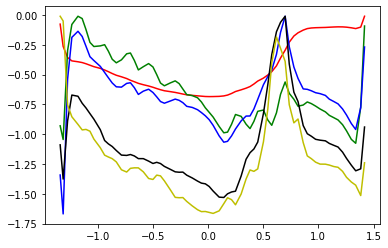

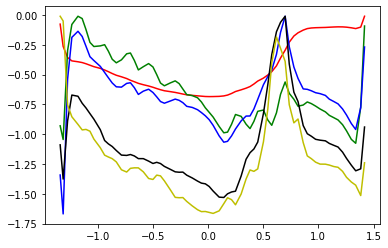

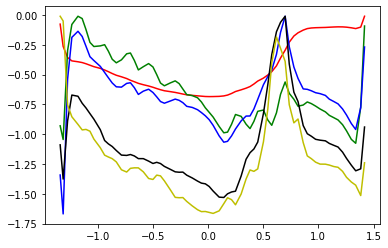

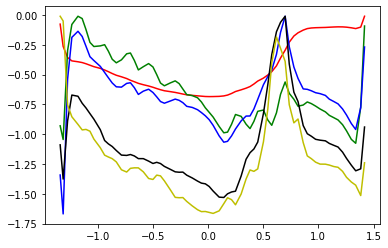

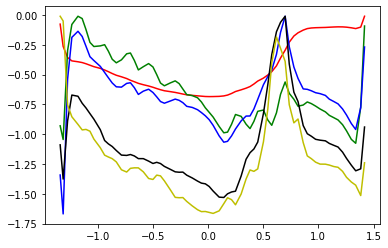

In [18]:
for i in [0,20,40,60,80]:
    pl.figure();
    pl.plot(pots[0,i,:70,0],pots[0,i,:70,1],'r-')
    pl.plot(pots[10,i,:70,0],pots[10,i,:70,1],'g-')
    pl.plot(pots[20,i,:70,0],pots[20,i,:70,1],'b-')
    pl.plot(pots[30,i,:70,0],pots[30,i,:70,1],'k-')
    pl.plot(pots[39,i,:70,0],pots[39,i,:70,1],'y-')

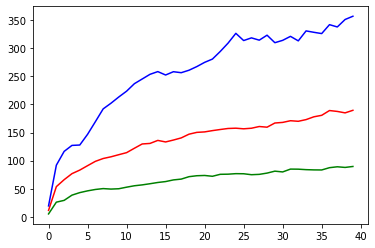

In [8]:
npots = 100
ncurves = npots
npoints = 140

nsteps = 40 #1000

dists = np.zeros((nsteps,3))
for step in range(nsteps):
    x = pots[step,:,:,0]
    y = pots[step,:,:,1]
    currents = [Current(space, pot) for pot in pots[step,:,:,:]]
    reps = [Representer(current, scale=.1) for current in currents]

    pe = pca_data(reps)
    pca_reps = PCA(pe, x, y,ncomp=20)
    embedding = np.zeros((100,20))
    #for i, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
    for i in range(100): #, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
        embedding[i,:] = pca_reps.pr[i]
        #pl.plot(embedding[:,0],embedding[:,1],'.')
    dist = np.zeros((100,100))
    for i in range(100):
        for j in range(i,100):
            dist[i,j] += np.linalg.norm(embedding[i,:]-embedding[j,:])
    np.savetxt('RW_currents64_emb'+str(step)+'.csv',embedding)
    np.savetxt('RW_currents64_dist'+str(step)+'.csv',dist)

    ind = np.where(dist!=0)
    dists[step,0] = np.median(dist[ind])
    dists[step,1] = np.percentile(dist[ind],5)
    dists[step,2] = np.percentile(dist[ind],95)
pl.plot(dists[:,0],'r');
pl.plot(dists[:,1],'g');
pl.plot(dists[:,2],'b');
    #print(step*25,dist)
    #

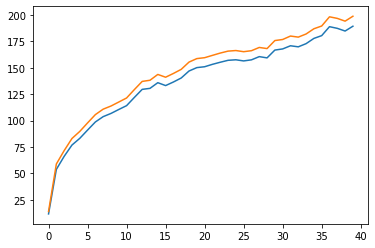

In [9]:
pl.plot(dists[:,0]);
pl.plot(dists[:,0]+np.sqrt(dists[:,1]))
#np.savetxt('rw_dists.csv',dists)

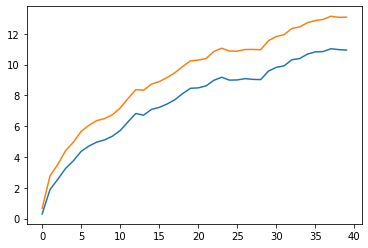

In [84]:
#L2 distances
dists = np.zeros((nsteps,3))
for step in range(nsteps):
    dist = np.zeros((100,100))
    for i in range(100):
        for j in range(i,100):
            dist[i,j] += np.linalg.norm(pots[step,i,:,:]-pots[step,j,:,:])
    ind = np.where(dist!=0)
    dists[step,0] = np.median(dist[ind])
    dists[step,1] = np.percentile(dist[ind],5)
    dists[step,2] = np.percentile(dist[ind],95)

    #dists[step,0] = np.sum(dist)/(100*99//2)
    #tally = 0
    #for i in range(100):
    #    for j in range(i,100):
    #        tally += (dist[i,j]-dists[step,0])**2
    #dists[step,1] = 1/((100*99//2)-1) * tally
pl.plot(dists[:,0]);
pl.plot(dists[:,0]+np.sqrt(dists[:,1]))

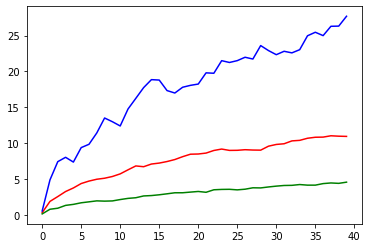

In [86]:
pl.plot(dists[:,0],'r');
pl.plot(dists[:,1],'g');
pl.plot(dists[:,2],'b');

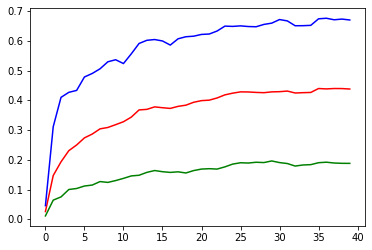

In [87]:
#L2 distances with a Procrustes alignment
from scipy.spatial import procrustes
npots = 100

newpots = np.zeros(np.shape(pots))
for i in range(nsteps):
    for j in range(npots):
        mtx1, newpots[i,j,:,:], _ = procrustes(pots[i,0,:,:],pots[i,j,:,:])
    newpots[i,j,:,:] = mtx1

dists = np.zeros((nsteps,3))
for step in range(nsteps):
    dist = np.zeros((100,100))
    for i in range(100):
        for j in range(i,100):
            dist[i,j] += np.linalg.norm(newpots[step,i,:,:]-newpots[step,j,:,:])
    ind = np.where(dist!=0)
    dists[step,0] = np.median(dist[ind])
    dists[step,1] = np.percentile(dist[ind],5)
    dists[step,2] = np.percentile(dist[ind],95)
pl.plot(dists[:,0],'r');
pl.plot(dists[:,1],'g');
pl.plot(dists[:,2],'b');

In [16]:
embedding[0,:]-embedding[2,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [6]:
# This is the full dataset
npoints = 138
npots = 716
ncurves =716
pots = np.loadtxt('../../AllPots/Code/FinalDatasetPoints.txt')
pots = pots.reshape([npoints+2,npots,2])
pots = pots.transpose((1,0,2))

In [6]:
x = pots[:,:-2,0]
y = pots[:,:-2,1]
currents = [Current(space, pot) for pot in pots[:,:-2,:]]
reps = [Representer(current, scale=.01) for current in currents]

In [ ]:
space = Space(order=8, meshsize=24,L=2)
#space = Space(order=3, meshsize=52,L=1)
currents = [Current(space, pot) for pot in pots[:,:-2,:]]
reps = [Representer(current, scale=.01) for current in currents]
uv = np.array([rep.get(order=3) for rep in reps])
uv = uv.reshape(len(reps),-1,order='F')
np.shape(uv)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [5]:
# Arianna's ones
pots = np.genfromtxt('../../AllPots/Data/NewSample_UnitLength_Procrustes.csv', delimiter=',')
np.shape(pots)
pots = pots.reshape(716,138,2)

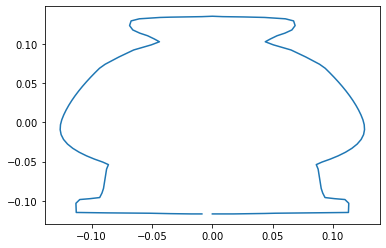

In [12]:
pl.plot(pots[7,:,0],pots[7,:,1])

In [6]:
#x = pots[:,::2]
#y = pots[:,1::2]
npots = 716
space = Space(order=4, meshsize=18,L=2)
currents = [Current(space, pot) for pot in pots]
reps = [Representer(current, scale=.01) for current in currents]
#space = Space(order=3, meshsize=52,L=1)
uv = np.array([rep.get(order=3) for rep in reps])
uv = uv.reshape(len(reps),-1,order='F')
np.shape(uv)
dist = np.zeros((npots,npots))
for i in range(npots):
    for j in range(i,npots):
        dist[i,j] = np.linalg.norm(uv[i,:]-uv[j,:])
#np.where(dist!=0)
np.savetxt('AriData_currents_l2_4_18_dists'+'.csv',dist)

In [ ]:
#uv = np.array([rep.get(order=3) for rep in reps])
#uv = uv.reshape(len(reps),-1,order='F')
#np.shape(uv)
dist = np.zeros((npots,npots))
for i in range(npots):
    for j in range(i,npots):
        dist[i,j] = np.linalg.norm(uv[i,:]-uv[j,:])
np.where(dist!=0)
np.savetxt('FullData_currents_l2_8_24_dists'+'.csv',dist)

In [7]:
#x = pots[:,:-2,0]
#y = pots[:,:-2,1]
x = pots[:,::2]
y = pots[:,1::2]

In [ ]:
pe = pca_data(reps)
pca_reps = PCA(pe, x, y,ncomp=20)
embedding = np.zeros((npots,20))
#for i, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
for i in range(npots): #, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
    embedding[i,:] = pca_reps.pr[i]
    #pl.plot(embedding[:,0],embedding[:,1],'.')
dist = np.zeros((npots,npots))
for i in range(npots):
    for j in range(i,npots):
        dist[i,j] = np.linalg.norm(embedding[i,:]-embedding[j,:])

#np.savetxt('FullData_currents_pca_24_dists'+'.csv',dist)
np.savetxt('AriData_currents_pca_16_dists'+'.csv',dist)

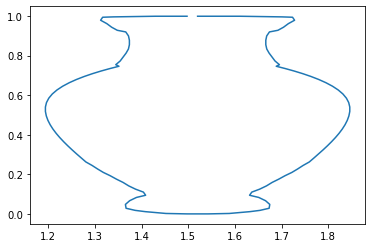

In [17]:
pl.plot(x[5,:],y[5,:])

In [64]:
tally = 0
for i in range(npots):
    for j in range(i,npots):
        tally += (dist[i,j]-dists[step,0])**2
dists[step,1] = 1/((npots*(npots-1)//2)-1) * tally

In [7]:
#pots = np.loadtxt('/home/marslast/Projects/Pots/Data/pots_open_procrustes.csv',delimiter=',')
#pots = np.loadtxt('/home/marslast/Projects/Pots/Data/pots_closed_procrustes.csv',delimiter=',')
pots = np.loadtxt('/home/marslast/Projects/AllPots/Data/GoodPots/GoodPots_closed_procrustes.csv',delimiter=',')
npots = np.shape(pots)[0]
ncurves = npots
npoints = np.shape(pots)[1]//2
pots = np.reshape(pots,[npots,npoints,2])
x = pots[:,:,0]
y = pots[:,:,1]
currents = [Current(space, pot) for pot in pots]
reps = [Representer(current, scale=.3) for current in currents]

NameError: name 'Current' is not defined

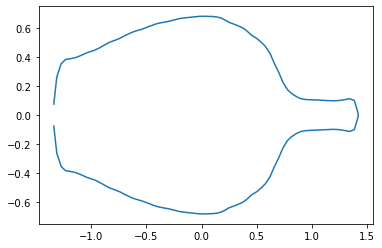

In [16]:
pl.plot(x[0,:],y[0,:]);

In [6]:
import ast
f = open('/home/marslast/Projects/AllPots/Data/GoodPots/PotIndex.txt','r')
index = f.readlines()
a = []
for x in range(len(index)):
    a.append(ast.literal_eval(index[x]))

# A cheap (not too crap!) way to make a set of 34 colours
import matplotlib.colors as mcolors
c = list(mcolors.CSS4_COLORS)

In [33]:
np.shape(pca_reps.pr)

(325, 20)

## Separate using the finite element representers

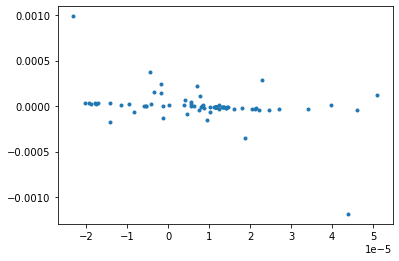

In [30]:
pe = pca_data(reps)
pca_reps = PCA(pe, x, y,ncomp=20)
embedding = np.zeros((100,20))
#for i, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
for i in range(100): #, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
        embedding[i,:] = pca_reps.pr[i]
pl.plot(embedding[:,0],embedding[:,1],'.')

np.savetxt('RW_currents0.csv',embedding)

In [18]:
pe = pca_data(reps)
pca_reps = PCA(pe, x, y,ncomp=20)
embedding = np.zeros((325,21))
#for i, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
for i in range(325): #, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
        pl.plot(pca_reps.pr[0],pca_reps.pr[1],'.',color=c[4*a[i][2]])
        embedding[i,:-1] = pca_reps.pr[i]
        embedding[i,-1] = a[i][0]

np.savetxt('AthenianBF_currents.csv',embedding)

NameError: name 'a' is not defined

In [25]:
%run monomials.py
x = pots[:,:,0].T
y = pots[:,:,1].T
pe = monomial_current_pca(x, y)
pca_pe = PCA(pe, x, y,ncomp=20)
embedding1 = np.zeros((100,20))

for i, (pr, x, y) in enumerate(zip(pca_pe.pr, pca_pe.x, pca_pe.y)):
        embedding1[i,:] = pr[0]
np.savetxt('RW_monomial0.csv',embedding1)

ValueError: too many values to unpack (expected 2)

In [26]:
%run monomials.py
x = pots[:,:,0]
y = pots[:,:,1]
pe = monomial_current_pca(x, y, 10)
pca_pe = PCA(pe, x, y,ncomp=20)
embedding1 = np.zeros((325,21))

for i, (pr, x, y) in enumerate(zip(pca_pe.pr, pca_pe.x, pca_pe.y)):
        pl.plot(pr[0],pr[1],'.',color=c[4*a[i][2]])
        embedding1[i,:-1] = pr[0]
        embedding1[i,-1] = a[i][0]
np.savetxt('AthenianBF_monomial.csv',embedding1)

ValueError: too many values to unpack (expected 2)

### Using the monomial representers

In [31]:
a = pe.mean(axis=0)
a = (a*np.ones((1,np.shape(pe)[1]))).T
a = np.tile(a,(1,np.shape(pe)[0]))
pe = pe - a.T

# Compute the PCA
D,V = np.linalg.eig(np.cov(pe.T))
order = np.argsort(D)
V = np.real(V)



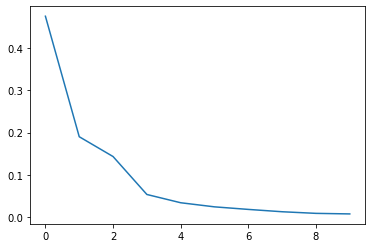

In [65]:
pl.plot(E[:10])

In [68]:
np.cumsum(E)

array([0.47400861, 0.66425144, 0.80782211, 0.86203036, 0.89676374,
       0.92183325, 0.94086354, 0.95440493, 0.96413183, 0.97255698,
       0.97999158, 0.98533515, 0.98830345, 0.99070321, 0.99247494,
       0.9941729 , 0.99574048, 0.99700149, 0.99795706, 0.9984735 ,
       0.99886657, 0.99920333, 0.99946995, 0.99963938, 0.99977893,
       0.99984443, 0.99988291, 0.99991933, 0.99994938, 0.99996868,
       0.99998129, 0.99998745, 0.9999922 , 0.99999553, 0.99999797,
       0.9999988 , 0.99999949, 0.99999971, 0.99999982, 0.9999999 ,
       0.99999992, 0.99999993, 0.99999994, 0.99999995, 0.99999996,
       0.99999996, 0.99999997, 0.99999997, 0.99999997, 0.99999998,
       0.99999998, 0.99999998, 0.99999998, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [14]:
print(np.cumsum(np.abs(pca_reps.pr[0,::-1])))

[ 5.01050731  6.40199718  6.92401356  7.86300309  8.0096822   8.28745044
  8.57745827  9.15138488  9.55325509  9.6160285  10.04941596 10.13066088
 10.23300072 10.37407337 10.60453757 10.65560851 10.67411568 10.76354253
 10.77639547 10.7933653 ]


In [21]:
print(pca_pe.pr[0,:])
print(np.cumsum(np.abs(pca_pe.pr[0,::-1])))

[ 0.0023975  -0.00667245  0.00876143 -0.01387998 -0.01251848  0.02752095
 -0.01700367  0.01079126 -0.03741231 -0.02155107  0.01420176  0.01374405
  0.0680352   0.019698    0.01058153 -0.01611839  0.12906884  0.08654036
  0.12392074 -0.41161724]
[0.41161724 0.53553798 0.62207834 0.75114718 0.76726557 0.7778471
 0.7975451  0.8655803  0.87932435 0.89352611 0.91507719 0.9524895
 0.96328076 0.98028443 1.00780538 1.02032386 1.03420384 1.04296527
 1.04963771 1.05203521]


In [24]:
ncurves, npoints = x.shape
cl = (npoints-1)*np.ones((1,ncurves),dtype=int)
u = representer(x,y,ncurves,cl,npoints,10)
u1 = np.zeros((ncurves,np.shape(u)[1]*np.shape(u)[2]*2))
for i in range(ncurves):
    u1[i,:] = np.matrix.flatten(u[i,:,:,:])

ValueError: not enough values to unpack (expected 2, got 1)

In [23]:
pca = PCA(u1, x, y)

NameError: name 'u1' is not defined

In [22]:
pca.plot(scaling=.001)

NameError: name 'pca' is not defined

## PCA on the FEM representer space

In [70]:
curves = np.stack([x,y], axis=-1)
reps = [Representer(Current(space, curve)) for curve in curves]

In [15]:
pe = pca_data(reps)

In [26]:
pca = PCA(pe, x, y)

(-0.3989229840898495,
 0.4471622121120674,
 -0.5947327780036176,
 0.45279624538361474)

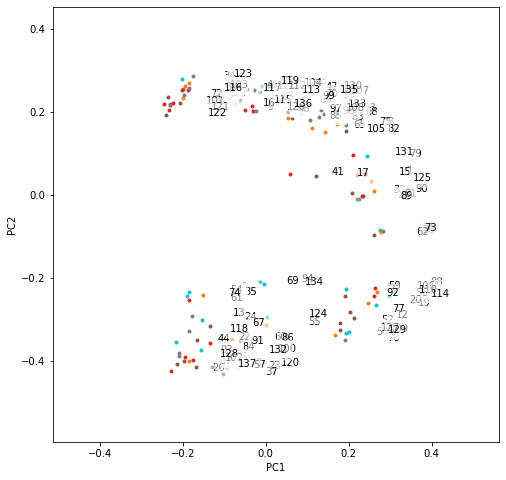

In [28]:
plt.figure(figsize=(8,8))
pca.plot(scaling=5, shift=(.1,0))
plt.axis('equal')

In [18]:
pca_opt(pca, scaling=2)

KeyboardInterrupt: 

### PCA with monomial representers

In [25]:
ncurves, npoints = x.shape
cl = (npoints-1)*np.ones((1,ncurves),dtype=int)
u = representer(x,y,ncurves,cl,npoints,10)
u1 = np.zeros((ncurves,np.shape(u)[1]*np.shape(u)[2]*2))
for i in range(ncurves):
    u1[i,:] = np.matrix.flatten(u[i,:,:,:])

ValueError: not enough values to unpack (expected 2, got 1)

In [20]:
pca = PCA(u1, x, y)

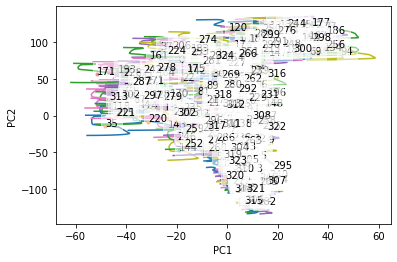

In [21]:
pca.plot(scaling=.01)

In [29]:
pe = monomial_current_pca(x, y, 10)
pca = PCA(pe, x, y)
plt.figure(figsize=(8,8))
pca.plot(scaling=20)
plt.axis('equal');

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
pca_opt(pca, scaling=20)

d(0,1), d(0,2), d(0,3)
order 1, mesh = 10, 20, 40
(2.2949783713748606, 2.4006275209345507, 2.2316118057013319)
(1.6047046605854045, 1.6207933275335604, 1.6825498540372308)
(1.2664142928892494, 1.2783837142622918, 1.3259963291001282)

order 4, mesh = 5, 10, 20
(2.2997301392640863, 2.2460204102017722, 2.2746276352501957)
(1.7498901419675774, 1.7855146077354773, 1.7592703776709591)

d(0,1), d(0,2), d(1,2)
order 4, mesh = 5, 10, 20
(2.7899967862469111, 2.8270892665201925, 0.8246409669811765)
(2.8852668644254802, 2.9246305575121454, 1.0339455136119406)
(2.9389698376057898, 2.9713066427066308, 1.1315582359980916)

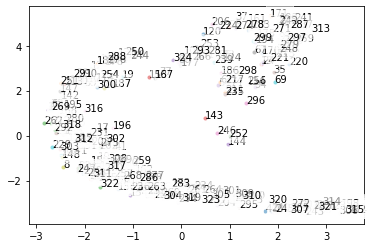

In [60]:
pe = monomial_current_pca(x, y, 10)
pca_pe = PCA(pe, x, y)
scaling = 0.1
shift=[0,0]
for i, (pr, x, y) in enumerate(zip(pca_pe.pr, pca_pe.x, pca_pe.y)):
        #pl.plot(-pr[0]+ x/scaling,pr[1] + y/scaling)
        pl.plot(-pr[0],pr[1],'.')
        pl.text(-pr[0]+shift[0],pr[1]+shift[1],i, bbox={'facecolor':'white', 'edgecolor': 'white', 'alpha':.5})


ValueError: not enough values to unpack (expected 2, got 1)

In [58]:
import ast
f = open('/home/marslast/Projects/Pots/Data/GoodPots/PotIndex.txt','r')
index = f.readlines()
a = []
for x in range(len(index)):
    a.append(ast.literal_eval(index[x]))

# A cheap (not too crap!) way to make a set of 34 colours
import matplotlib.colors as mcolors
c = list(mcolors.CSS4_COLORS)

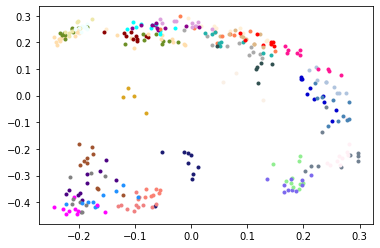

In [59]:
for i, (pr, x, y) in enumerate(zip(pca.pr, pca.x, pca.y)):
        pl.plot(-pr[0],pr[1],'.',color=c[4*a[i][2]])

In [ ]:
for i, (pr, x, y) in enumerate(zip(pca.pr, pca.x, pca.y)):
        pl.plot(-pr[0],pr[1],'.',color=c[4*a[i][2]])